<a href="https://colab.research.google.com/github/SK-0911/PlacementPal-Chatbot/blob/main/PlacementPal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [ ]:
##### Read Data
data=pd.read_csv("Questions.csv", encoding = "ISO-8859-1")

In [ ]:
##### Visualize your Data
print ("Let's explore our question set",data["Question"])
print ("Length of training set",len(data["Question"]))
print ("Unique answers are",set(data["Classes"])," and number of unique answers are ", len(set(data["Classes"])))

Let's explore our question set 0                                                 Hello
1                                              Heyy Pal
2                                              Hey Bro!
3                                        Hiya, chatbot!
4                    Hey, I'm looking for some answers.
                            ...                        
95                How Can I secure the best Placements?
96    How can I prepare myself to get the best package?
97    Are there any industry-specific certifications...
98    How can I leverage my unique skills and experi...
99    What skills do companies look for during place...
Name: Question, Length: 100, dtype: object
Length of training set 100
Unique answers are {'Placement Data - packages', 'Placement Data - roles', 'Placement Process', 'Preparation', 'Other', 'Placement Data - companies', 'Greetings', 'Trouble shooting', 'Training', 'Document Verification'}  and number of unique answers are  10


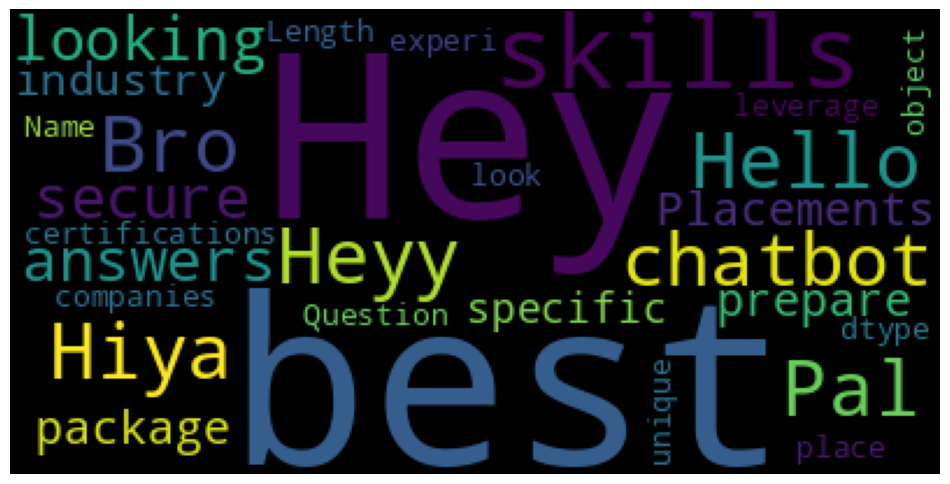

In [ ]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(data['Question'])

In [ ]:
##### Let's change the list of questions into list of words for better visualization
# word_list=[]
# list_question=list(data["Question"])
# for sentence in list_question:
# 	words_sentence=sentence.split()
# 	for words in words_sentence:
# 		word_list.append(words)


word_list=[word for sentence in list(data["Question"]) for word in sentence.split()]
print(word_list)

['Hello', 'Heyy', 'Pal', 'Hey', 'Bro!', 'Hiya,', 'chatbot!', 'Hey,', "I'm", 'looking', 'for', 'some', 'answers.', 'Hey,', 'how', 'are', 'you?', 'Hi,', "what's", 'up?', 'Hey,', 'can', 'you', 'help', 'me?', 'Hi,', 'I', 'need', 'assistance.', 'Hey,', 'chatbot,', 'spill', 'the', 'tea!', 'How', 'many', 'companies', 'visited', 'last', 'year?', 'What', 'were', 'the', 'top', 'companies', 'that', 'visited', 'campus', 'last', 'year?', 'What', 'were', 'the', 'top', 'companies', 'that', 'visited', 'previously?', 'What', 'were', 'the', 'top', 'recruiters', 'during', 'the', 'placement', 'season', 'last', 'year?', 'Can', 'you', 'provide', 'insights', 'into', 'the', 'latest', 'placement', 'statistics,', 'including', 'the', 'companies', 'that', 'have', 'recruited', 'from', 'our', 'campus?', 'How', 'many', 'companies', 'participated', 'in', 'the', 'placement', 'drive', 'last', 'year?', 'Can', 'you', 'provide', 'a', 'list', 'of', 'companies', 'that', 'visited', 'the', 'campus', 'in', 'the', 'previous', '

In [ ]:
##### Now let's find the frequency of each word and the most common words in the corpus
frequency=Counter(word_list)
print (frequency)
print (frequency.most_common(5))

Counter({'the': 64, 'What': 41, 'for': 40, 'I': 34, 'placement': 28, 'can': 23, 'to': 23, 'my': 18, 'How': 17, 'are': 14, 'companies': 14, 'during': 14, 'you': 13, 'that': 12, 'Can': 12, 'in': 12, 'there': 12, 'was': 11, 'training': 10, 'a': 9, 'of': 9, 'placements?': 9, 'or': 9, 'technical': 9, 'provide': 8, 'do': 8, 'documents': 8, 'Are': 8, 'last': 7, 'year?': 7, 'by': 7, 'job': 7, 'and': 7, 'verification?': 7, 'document': 6, 'any': 6, 'help': 5, 'were': 5, 'top': 5, 'our': 5, 'specific': 5, 'placement?': 5, 'students': 5, 'upload': 5, 'is': 5, 'Where': 5, 'process?': 5, 'prepare': 5, 'cell': 5, 'skills': 5, 'skills?': 5, 'should': 5, 'Hey,': 4, "I'm": 4, 'some': 4, 'need': 4, 'visited': 4, 'positions': 4, 'offered': 4, 'roles': 4, 'offer': 4, 'available': 4, 'find': 4, 'me': 4, 'workshops': 4, 'Is': 4, 'resources': 4, 'enhance': 4, 'improve': 4, 'practice': 4, 'many': 3, 'campus': 3, 'from': 3, 'season?': 3, 'about': 3, 'CTC?': 3, 'average': 3, 'package?': 3, 'median': 3, 'details'

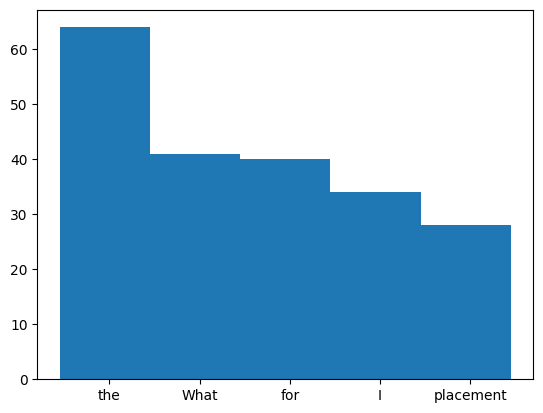

In [ ]:
import numpy as np

labels,values = zip(*frequency.items())
labels=[]
values=[]
for T in frequency.most_common(5):
    labels.append(T[0])
    values.append(T[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.05, labels)
plt.show()

In [ ]:
### Remove Punctuations and change words to lower case
def remove_punctuations(text):
    words=[word.lower() for word in text.split()]
    words=[w for word in words for w in re.sub(r'[^\w\s]','',word).split()]
    return words

data["question_punctuation_removed"]=data["Question"].apply(remove_punctuations)
print (data["question_punctuation_removed"])

0                                               [hello]
1                                           [heyy, pal]
2                                            [hey, bro]
3                                       [hiya, chatbot]
4                [hey, im, looking, for, some, answers]
                            ...                        
95         [how, can, i, secure, the, best, placements]
96    [how, can, i, prepare, myself, to, get, the, b...
97    [are, there, any, industryspecific, certificat...
98    [how, can, i, leverage, my, unique, skills, an...
99    [what, skills, do, companies, look, for, durin...
Name: question_punctuation_removed, Length: 100, dtype: object


In [ ]:
### Remove StopWords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
print (stop)
def remove_stopwords(text):
	modified_word_list=[word for word in text if word not in stop]
	return modified_word_list

data["question_stopword_removed"]=data["question_punctuation_removed"].apply(remove_stopwords)
print (data["question_stopword_removed"])

{'nor', 'about', 'not', 'but', "mightn't", 'd', "hadn't", 'all', "that'll", 'over', "won't", 'aren', 'their', 'off', 'theirs', 'm', 'and', "wouldn't", 'haven', 'who', 'will', 'above', "you'll", 'our', 'y', 'those', 'when', 'below', 'doesn', 'after', "don't", 'on', 'll', 'himself', 'or', 'out', 'isn', 'was', 'themselves', 'during', 'o', 't', 'ourselves', 'which', 'her', "haven't", 'more', 'if', 'other', 'yourselves', 'is', 'itself', "you're", 'very', 'won', "doesn't", 'each', 'my', 'wouldn', 'being', 'me', 'what', 'doing', 'were', 'under', 'couldn', "weren't", 'am', 'they', 'own', "couldn't", 're', 's', 'having', 'by', 'further', 'did', 'this', 'while', 'yourself', 'needn', 'ma', 'these', 'how', 'between', 'does', "didn't", 'as', 'until', 'it', 'whom', 'should', 'through', "should've", 'are', 'the', 'too', "you'd", 'than', 'here', "isn't", 'in', 'do', 'can', "mustn't", 'shouldn', 'his', 'he', 'herself', 'weren', 'any', 'hers', 'that', 've', 'just', 'same', 'its', 'now', 'we', 'because',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def negation_handling(words):
    counter=False
    wlist=[]
    negations=["no","not","cant","cannot","never","less","without","barely","hardly","rarely","no","not","noway","didnt"]
    #for words in wordlist:
    for i,j in enumerate(words):
            if j in negations and i<len(words)-1:
                wlist.append(str(words[i]+'-'+words[i+1]))
                counter=True
            else:
                if counter is False:
                    wlist.append(words[i])
                else:
                    counter=False
    return wlist

data["question_negated"]=data["question_punctuation_removed"].apply(negation_handling)
print (data["question_negated"])

0                                               [hello]
1                                           [heyy, pal]
2                                            [hey, bro]
3                                       [hiya, chatbot]
4                [hey, im, looking, for, some, answers]
                            ...                        
95         [how, can, i, secure, the, best, placements]
96    [how, can, i, prepare, myself, to, get, the, b...
97    [are, there, any, industryspecific, certificat...
98    [how, can, i, leverage, my, unique, skills, an...
99    [what, skills, do, companies, look, for, durin...
Name: question_negated, Length: 100, dtype: object


In [ ]:
import nltk
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')


def descriptive_words(words):
    meaningful_words=[]
    tags=['VB','VBP','VBD','VBG','VBN','JJ','JJR','JJS','RB','RBR','RBS','UH',"NN",'NNP']
    tagged_word=pos_tag(words)
    for word in tagged_word:
        if word[1] in tags:
            meaningful_words.append(word[0])
    return meaningful_words
data["question_descriptive"]=data["question_negated"].apply(descriptive_words)
# print (data["question_descriptive"])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
### Stemming of Words
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()
def Stemming(text):
	stemmed_words=[st.stem(word) for word in text]
	return stemmed_words

data["question_stemmed"]=data["question_descriptive"].apply(Stemming)
print (data["question_stemmed"])

0                                          [hello]
1                                      [heyi, pal]
2                                       [hey, bro]
3                                  [hiya, chatbot]
4                                  [hey, im, look]
                          ...                     
95                                [i, secur, best]
96                  [i, prepar, get, best, packag]
97    [are, industryspecif, train, enhanc, profil]
98                      [i, leverag, uniqu, stand]
99                                      [do, look]
Name: question_stemmed, Length: 100, dtype: object


In [ ]:
### Recreating the sentence
def Recreate(text):
	word=" ".join(text)
	return word

data["modified_sentence"]=data["question_stemmed"].apply(Recreate)
# print (data["modified_sentence"])

In [ ]:
def Cleaning(text):
    text_punctuation_removed=remove_punctuations(text)
    text_stopword_removed=remove_stopwords(text_punctuation_removed)
    text_unnegated=negation_handling(text_punctuation_removed)
    text_descriptive=descriptive_words(text_unnegated)
    text_stemmed=Stemming(text_descriptive)
    final_text=Recreate(text_stemmed)
    return final_text
data["modified_sentence"]=data["Question"].apply(Cleaning)
# print (data["modified_sentence"])

In [ ]:
### Let's change the sentence into a bag of word model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Question"]).toarray()
print(X)
# print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [ ]:
###### Extra Tf-idf transformation and DataPipelines
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

X = model.fit_transform(data["modified_sentence"]).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Term Frequency (TF):** This measures the frequency of a term (word) in a document. It's calculated as the number of times a term appears in a document divided by the total number of terms in the document. Essentially, it measures how often a term occurs in a document.

**Inverse Document Frequency (IDF):** This measures the importance of a term across a collection of documents (corpus). It's calculated as the logarithm of the total number of documents divided by the number of documents containing the term. Essentially, it measures how unique or rare a term is across the entire corpus.

In [ ]:
Y=data["Classes"]
question="How can I prepare for PayPal's Hackerrank Test for the role of Software Engineer?"

In [ ]:
type(Y)

pandas.core.series.Series

### Code for Testing Purpose

In [ ]:
testing = pd.read_csv("Testing.csv", encoding = "ISO-8859-1")

In [ ]:
X_test = testing["Question"]

In [ ]:
y_test = testing['Classes']
print(type(y_test))

<class 'pandas.core.series.Series'>


### Logistic Regression

In [ ]:
### Let's create our first Classification model

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression().fit(X, Y) #X-train, y_train


P=model.transform([Cleaning(question)])
predict1=clf1.predict(P)
print (predict1)

['Other']


In [ ]:
''' Logistic Regression '''

y_pred_lr = []
for test_q in X_test:
   P=model.transform([Cleaning(test_q)])
   predict1=clf1.predict(P)
   y_pred_lr.append(predict1)



# Calculate accuracy, precision, recall, and f1-score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Print the results
print(f'Accuracy Score: {accuracy_lr*100:.2f}%')
print(f'Precision: {precision_lr*100:.2f}%')
print(f'Recall: {recall_lr*100:.2f}%')
# print(f'F1-Score: {f1_lr*100:.2f}%')

Accuracy Score: 85.00%
Precision: 80.00%
Recall: 85.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X, Y)

P=model.transform([Cleaning(question)])
predict2=clf2.predict(P)
print (predict2)

['Other']


In [ ]:
''' Multinomial NB '''

y_pred_mnb = []
for test_q in X_test:
   P=model.transform([Cleaning(test_q)])
   predict2=clf2.predict(P)
   y_pred_mnb.append(predict2)


# Calculate accuracy, precision, recall, and f1-score
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb, average='weighted')
recall_mnb = recall_score(y_test, y_pred_mnb, average='weighted')
f1_mnb = f1_score(y_test, y_pred_mnb, average='weighted')

# Print the results
print(f'Accuracy Score: {accuracy_mnb*100:.2f}%')
print(f'Precision: {precision_mnb*100:.2f}%')
print(f'Recall: {recall_mnb*100:.2f}%')
# print(f'F1-Score: {f1_mnb*100:.2f}%')

Accuracy Score: 75.00%
Precision: 73.33%
Recall: 75.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier().fit(X, Y)

P=model.transform([Cleaning(question)])
predict3=clf3.predict(P)
print (predict3)

['Other']


In [ ]:
''' Decision Tree Classifier '''

y_pred_dt = []
for test_q in X_test:
   P=model.transform([Cleaning(test_q)])
   predict3=clf3.predict(P)
   y_pred_dt.append(predict3)



# Calculate accuracy, precision, recall, and f1-score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Print the results
print(f'Accuracy Score: {accuracy_dt*100:.2f}%')
print(f'Precision: {precision_dt*100:.2f}%')
print(f'Recall: {recall_dt*100:.2f}%')
# print(f'F1-Score: {f1_dt*100:.2f}%')

Accuracy Score: 70.00%
Precision: 55.67%
Recall: 70.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
clf4 = LinearSVC().fit(X, Y)

P=model.transform([Cleaning(question)])
predict4 = clf4.predict(P)
print(predict4)

['Other']


In [ ]:
''' Linear SVC '''

y_pred_lvc = []
for test_q in X_test:
   P=model.transform([Cleaning(test_q)])
   predict4=clf4.predict(P)
   y_pred_lvc.append(predict4)



# Calculate accuracy, precision, recall, and f1-score
accuracy_lvc = accuracy_score(y_test, y_pred_lvc)
precision_lvc = precision_score(y_test, y_pred_lvc, average='weighted')
recall_lvc = recall_score(y_test, y_pred_lvc, average='weighted')
f1_lvc = f1_score(y_test, y_pred_lvc, average='weighted')

# Print the results
print(f'Accuracy Score: {accuracy_lvc*100:.2f}%')
print(f'Precision: {precision_lvc*100:.2f}%')
print(f'Recall: {recall_lvc*100:.2f}%')
# print(f'F1-Score: {f1_lvc*100:.2f}%')

Accuracy Score: 80.00%
Precision: 75.00%
Recall: 80.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier().fit(X, Y)

P=model.transform([Cleaning(question)])
predict5 = clf5.predict(P)
print(predict5)

['Other']


In [ ]:
''' Random Forest Classifier '''

y_pred_rf = []
for test_q in X_test:
   P=model.transform([Cleaning(test_q)])
   predict5=clf5.predict(P)
   y_pred_rf.append(predict5)


# Calculate accuracy, precision, recall, and f1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print the results
print(f'Accuracy Score: {accuracy_rf*100:.2f}%')
print(f'Precision: {precision_rf*100:.2f}%')
print(f'Recall: {recall_rf*100:.2f}%')
# print(f'F1-Score: {f1_rf*100:.2f}%')

Accuracy Score: 70.00%
Precision: 55.67%
Recall: 70.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
final_predict=[]
final_predict=list(predict1)+list(predict2)+list(predict3)+list(predict4)+list(predict5)
final_predict = Counter(final_predict)
print ("Thus answer to your question is",final_predict.most_common(1)[0][0])

'''
Other: 2,
Training: 2,
Prep : 1
'''

Thus answer to your question is Other


'\nOther: 2,\nTraining: 2,\nPrep : 1\n'

In [ ]:
def Predict(text):
    P=model.transform([Cleaning(text)])
    predict1=clf1.predict(P)

    predict2=clf2.predict(P)

    predict3=clf3.predict(P)

    predict4=clf4.predict(P)

    predict5=clf5.predict(P)

    final_predict=[]
    final_predict=list(predict1)+list(predict2)+list(predict3)+list(predict4)+list(predict5)
    final_predict = Counter(final_predict)

    return final_predict.most_common(1)[0][0]

Applying Predict on Testing dataset

In [ ]:
print(X_test)

0                               Hello, can you help me?
1                                     Heyy PlacementPal
2     Which companies visited last year for placements?
3     Last year, which companies recruited the most ...
4     For what roles do companies hire during on-cam...
5     What kinds of positions do companies usually o...
6     What was the Average CTC that was offered last...
7     What was the highest and average package that ...
8     Please provide me with a list of the documents...
9     Where do I have to upload my marksheet for ver...
10    Does Placement Department conduct any training...
11    Are there any upcoming training sessions, webi...
12    Does Placement Department provide any material...
13    From where can I prepare for Infosys Aptitude ...
14     What does a typical placement process look like?
15    My CGPA is less than 3, Am I eligible to sit f...
16    I am facing an issue while uploading my marksh...
17    I am getting an error when I am entering d

Applying the model for test dataset

In [ ]:
y_pred = []
for test_q in X_test:
  # print(q)
  pred = Predict(test_q)
  y_pred.append(pred)


print(X_test)
print(y_pred)

0                               Hello, can you help me?
1                                     Heyy PlacementPal
2     Which companies visited last year for placements?
3     Last year, which companies recruited the most ...
4     For what roles do companies hire during on-cam...
5     What kinds of positions do companies usually o...
6     What was the Average CTC that was offered last...
7     What was the highest and average package that ...
8     Please provide me with a list of the documents...
9     Where do I have to upload my marksheet for ver...
10    Does Placement Department conduct any training...
11    Are there any upcoming training sessions, webi...
12    Does Placement Department provide any material...
13    From where can I prepare for Infosys Aptitude ...
14     What does a typical placement process look like?
15    My CGPA is less than 3, Am I eligible to sit f...
16    I am facing an issue while uploading my marksh...
17    I am getting an error when I am entering d

In [ ]:
# Calculate precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy Score: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
# print(f'F1-Score: {f1*100:.2f}%')

Accuracy Score: 85.00%
Precision: 80.00%
Recall: 85.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
###### Generate Answers ######
answer_dictionary={
    "Greetings":
        "Hello 👋🏻 I am PlacementPal , How can I assist you today?"
        ,
      "Placement Data - companies":
          '''Last year, a total of 50 companies visited our campus for placements. Some of the prominent recruiters were
          Accenture, Capgemini, Genpact, TCS, Infosys, and many others. During placements, coompanies primarily look for candidates with strong
          technical skills such as programming languages like Python, Java, and C++, as well as proficiency in data analysis, problem-solving,
          and communication. The roles offered by these companies vary, including software engineer, data analyst, business analyst, product manager, and more.'''
          ,
    "Placement Data - packages":
          '''The highest package offered was 15,00,000 per annum.
          The average CTC stood at Rs 6,00,000 per annum, where as median CTC was Rs 6,00,000 per annum'''
          ,
    "Placement Data - roles":
        '''During final year placements, companies come for a range of positions including
          Frontend Developer, Backend Developer, Software Developer, Associate Software Engineer,
          Data Analyst, Business Analyst, Graduate Engineer Trainee, Graduate Analyst, etc.
          Last year, the majority of companies recruited for the position of Graduate Engineer Trainee,
          but the highest salary was offered for the role of Software Engineer.'''
    ,
      "Document Verification":
          '''You can upload your documents under Documents section in your student dashboard which will be verified once you submit.
          Please make sure you have the scanned copy of the following documents :-
              - CV
              - Last Semester Marksheet
              - 12th Marksheet
              - 10th Marksheet'''
       ,
      "Training":
          '''For information regarding available training programs to prepare for placements or details about
          placement training workshops offered by the placement cell, I recommend visiting the
          Training and Placement tab on our website. You'll find comprehensive information and updates regarding
          all training programs and workshops offered to help students prepare for placements.'''
      ,
      "Preparation":
          '''The Placement Department consistently uploads articles and videos aimed at assisting students in their preparation for placements.
          These resources are available in the 'Preparation' Section''',

      "Placement Process":
          '''Every company follows its unique hiring process, with specific details provided upon application.
          Typically, for B.Tech students the hiring process involves an Aptitude round, Coding Round, Technical Interview(s), and HR Interview.
          It's important to note that during Technical and HR Interviews, students are expected to dress formally,
          wearing an NMIMS Blazer, and bring a hard copy of their CV. For more detailed information, students are encouraged to thoroughly review
          the dress code section in the NMIMS Placement Policy.'''
      ,
      "Trouble shooting":
        '''If you are experiencing any tecnical glitches, try contacting your Placement Co-ordinator'''
      ,


    }

In [ ]:
def generate_answer(predict_class):
    ans=answer_dictionary[predict_class]
    return ans

# Gemini

In [ ]:
import pathlib
import textwrap
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
gen_model = genai.GenerativeModel('gemini-pro')

SecretNotFoundError: Secret GOOGLE_API_KEY does not exist.

In [ ]:
def ask_gemini(ques):
    response = gen_model.generate_content(ques)
    to_markdown(response.text)
    return response.text

# Main Code

In [ ]:
###### The ChatBot #######
question = input("Enter Question = ")
prediction = Predict(question)
# print(prediction)
if (prediction == "Other"):
      print(ask_gemini(question))
else:
  ans=generate_answer(prediction)
  print("Answer = ",ans)